# Subsetting

Review core methods to select data from a `pandas.DataFrame`

## Read in CSV

To read in a CSV file as a `pandas.DataFrame` we use the `pandas.read_csv` function:

In [1]:
import pandas as pd

# Read in file, argument is file path
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Print first five rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


Birds that were surveyed in four wetlands:

- Carpinteria salt marsh (CSM)
- Mugu lagoon (MUL)
- San Dieguito Wetland (SDW)
- Tijiuana Estuary (TJE)

Values from the second column to the last column = number of different bird species recorded across the survey sites in each wetland during spring, winter, and fall, for a given year. 

In [2]:
# View column names and types of each variable
print(df.columns)
print(df.dtypes)

Index(['year', 'CSM_winter', 'CSM_spring', 'CSM_fall', 'MUL_winter',
       'MUL_spring', 'MUL_fall', 'SDW_winter', 'SDW_spring', 'SDW_fall',
       'TJE_winter', 'TJE_spring', 'TJE_fall'],
      dtype='object')
year            int64
CSM_winter    float64
CSM_spring    float64
CSM_fall      float64
MUL_winter    float64
MUL_spring    float64
MUL_fall      float64
SDW_winter    float64
SDW_spring    float64
SDW_fall      float64
TJE_winter    float64
TJE_spring    float64
TJE_fall      float64
dtype: object


In [3]:
# Print df shape: output is a tuple with # rows, # columns
df.shape

(14, 13)

## Selecting a single column

Simplest case: select a single column by column name

General syntax:
```python
df['column_name']
```

This is an example of **label-based subsetting**, which means we want to select data from df using the *names* of the columns, not their position. 

## Example
Select the number of bird species at Mugu lagoon in spring

In [4]:
# Select a single column by using []
mul_spring = df['MUL_spring']

In [5]:
mul_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

In [6]:
# Confirm the type of output
type(mul_spring)

pandas.core.series.Series

Recall: we can think of a pd df as a dictionary of its columns.
Then, we can access a single column using the column name as the *key*, just like we would in a dictionary:

`df['column_name']`

We can also do label-based subsetting of a single column using attribute syntax:
```python
df.column_name
```

Example:

In [7]:
df.MUL_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

**Favor `df['column_name']` instead of `df.column_name`**

why?

- `df['column_name']` avoids conflicts with `pd.DataFrames` methods and attributes. For example, if the df has a column named `count` it's ambiguous whether pd.count is referring to count method or to the count column.  
- `df['column_name']` can take any name
`df.column_name` only works with no spaces or special characters

## Selecting multiple columns

### ... using a list of column names

Select multiple columns in a single call by passing a list

```python
df[ ['col1', 'col2', 'col100'] ]
```

Notice the double square brackets, bc we are passing a list of names `['col1', 'col2', 'col100']` to the selection brackets

### Example

In [8]:
# Select the columns `TJE_winter` and `TJE_fall`
tje_wf = df[['TJE_winter', 'TJE_fall']]
tje_wf

,TJE_winter,TJE_fall
0,NaN,81.0
1,67.0,NaN
2,70.0,69.0
3,69.0,64.0
4,60.0,62.0
5,73.0,64.0
6,76.0,58.0
7,72.0,57.0
8,66.0,55.0
9,63.0,50.0


### ... using a slice

To select a slice of the columns, we'll use a special case of the **`loc` selection**, general syntax:

```python
df.loc[ : , 'column_start': 'column_end']
```

Starting and ending points of the column slice we want to subset from the df

Notice:

- the first value passed to `loc` is used for rows, the second space is for columns. using ` : ` as the row-selection parameter selects all the rows
- the slice of hte resulting data is inclusive, it includes both endpoints of the slice. 

In [9]:
# Select columns btwn `CSM_winter` and `MUL_fall`
csm_mul = df.loc[:, 'CSM_winter':'MUL_fall']
csm_mul.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall
0,39.0,40.0,50.0,45.0,NaN,61.0
1,48.0,44.0,NaN,58.0,52.0,NaN
2,51.0,43.0,49.0,57.0,58.0,53.0
3,42.0,46.0,38.0,60.0,58.0,62.0
4,38.0,43.0,45.0,49.0,52.0,57.0


## Selecting rows

### ... using a condition

```python
df[condition_on_rows]
```

The condition on rows can be many things:

### Example

We are interested in data after 2020. 

In [10]:
# Select all rows w year > 2020
post_2020 = df[df['year'] > 2020]
post_2020

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


condition for rows = `df['year'] > 2020`
this is a `pandas.Series` with boooooolean values (`True` and `False`) indiating which rows satisfy the condition

In [11]:
# Check the type of df['year'] > 2020
print(type(df['year'] > 2020))

# Print boolean series
df['year'] > 2020

<class 'pandas.core.series.Series'>


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
Name: year, dtype: bool

This series acts as a mask for the df, only keeps the things that are true. 

### Check in
Subset of SDW has at least 75 species recorded during spring

In [12]:
sdw_spring = df[df['SDW_spring'] >= 75]
sdw_spring

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


## Basic Plotting

### Check-in exercise 1
Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

In [ ]:
df.plot(color = '#8CBBF4', 
            title = 'Graph of spring bird observations at Mugu lagoon', 
                                                  ylabel = 'Observations', 
                                                  xlabel = 'Year')

<AxesSubplot:title={'center':'Graph of spring bird observations at Mugu lagoon'}, xlabel='Year', ylabel='Observations'>

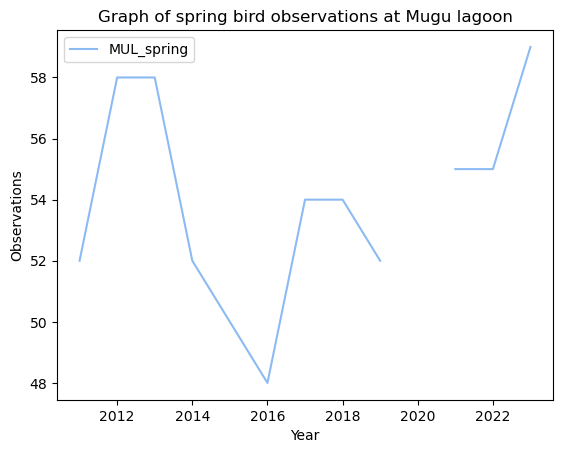

In [2]:
df[['MUL_spring', 'year']].set_index('year').plot(color = '#8CBBF4', 
                                                  title = 'Graph of spring bird observations at Mugu lagoon', 
                                                  ylabel = 'Observations', 
                                                  xlabel = 'Year')

<AxesSubplot:title={'center':'Graph of spring bird observations at Mugu lagoon'}, xlabel='Year', ylabel='Observations'>

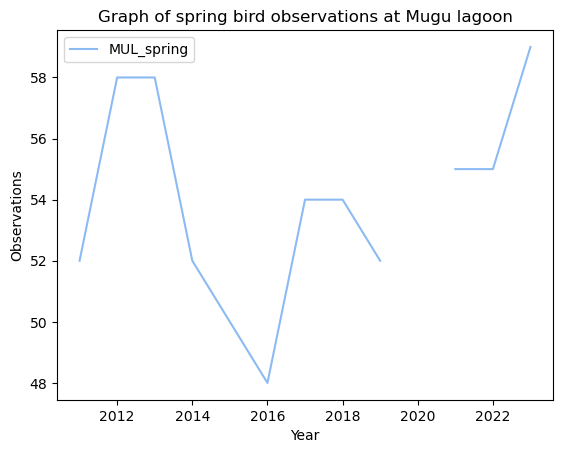

In [20]:
mul_spring.plot(color = '#8CBBF4', 
                title = 'Graph of spring bird observations at Mugu lagoon', 
                ylabel = 'Observations', 
                xlabel = 'Year')

In [21]:
df[pd.isna(df['MUL_spring'])]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


In [20]:
mul_na = df['MUL_spring'].isna() == True
mul_na

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
Name: MUL_spring, dtype: bool

Without running the code, give a step-by-step breakdown of what this code is doing:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

Is this code modifying the data frame df? Why or why not?

- The code is not modifying the data frame because the functions were not done in place or reassigned to the data frame. 

Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

<AxesSubplot:xlabel='year'>

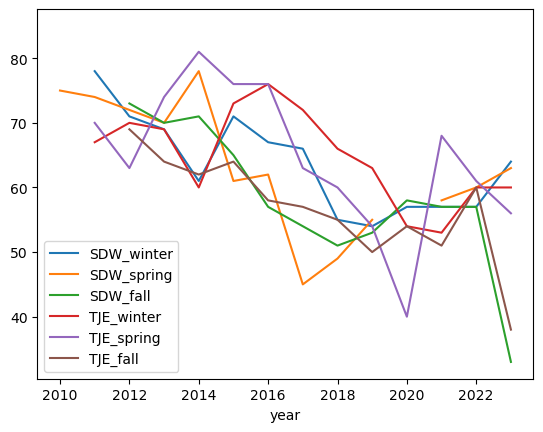

In [27]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

#### Example

We want to look at data from years 2012 to 2015 including both years.
We can use this `between` method in our condition

In [4]:
subset = df[ df['year'].between(2012,2015)]
subset

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0
5,2015,44.0,42.0,45.0,58.0,50.0,51.0,71.0,61.0,65.0,73.0,76.0,64.0


Let's break it down:

1. `df['year']` = column with the year values, a `pandas.Series`
2. in `df['year'.between()` we are accessing a method for the `pandas.Series` using the `.`
3. (2012, 2015) = parameters, this includes both endpoints.
4. `df['year'].between(2012,2015)` a `pandas.Series` of boolean values indicating which rows have year value between 2012 and 2015
5. When we put `df['year'].between(2012,2015)` inside the selection brackets `[]` we obtain the rows we wanted to select

## Avoid using `loc` for selecting only rows

It is equivalent to write the following

In [5]:
# Select rows with year<2015
df[df['year'] < 2015]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


In [6]:
# Select rows with year < 2015 using loc
df.loc[df['year'] < 2015, :] # Colon tells you to select all columns

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


We prefer first syntax because it's simpler

### using multiple conditions 

We can combine multiple conditions to select rows by surrounding each condition in parentheses and using the or and and operators `|` and `&`

## Example: or
select rows in which the CSM has more than 50 species registered in winter *or* fall 

In [7]:
df[(df['CSM_winter'] > 50) | (df['CSM_fall'] > 50)]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


## Example: or
select rows in which the CSM and SDW more than 60 species registered in spring 

In [9]:
df[(df['CSM_spring'] > 60) & (df['SDW_spring'] > 60)]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall


An empty df, no rows satisfy the conditions

## select rows by position

Sometimes we may want to select certain rows based on their *actual position* in the df. aka, using position-based subsetting

To do this, we us **iloc**

```python
df.iloc[row-indices]
```

`iloc` = integer location

## Example:

In [10]:
# Select the fifth row (index = 4)
df.iloc[4]

year          2014.0
CSM_winter      38.0
CSM_spring      43.0
CSM_fall        45.0
MUL_winter      49.0
MUL_spring      52.0
MUL_fall        57.0
SDW_winter      61.0
SDW_spring      78.0
SDW_fall        71.0
TJE_winter      60.0
TJE_spring      81.0
TJE_fall        62.0
Name: 4, dtype: float64

In [12]:
# Select from the 10th through the 13th, including 13
df.iloc[9:14]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
9,2019,39.0,39.0,40.0,57.0,52.0,53.0,54.0,55.0,53.0,63.0,54.0,50.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


### Selecting rows and columns simultaneously

Can be done using loc or ilox 

### by labels or positions
When we want to select rows and columns simultaneously by labels, we can use `loc` selection with the syntax

```python
df.loc[ row-selectoion, column-selection]
```

#### Example:

Select winter surveys form MUL and TJE after 2020

In [13]:
df.loc[df['year'] > 2020 , ['MUL_winter', 'TJE_winter'] ]

,MUL_winter,TJE_winter
11,54.0,53.0
12,60.0,60.0
13,72.0,60.0


## selecting by position

select rows 3-7 including 7 and 4th and 5th columns

In [17]:
df.iloc[3:8 , [3,4]]

,CSM_fall,MUL_winter
3,38.0,60.0
4,45.0,49.0
5,45.0,58.0
6,47.0,63.0
7,43.0,57.0


## Notes

iloc usese integer location and uses integer indexing the same way as indexing a python list

### iloc for column selection? --> avoid it

We can also access columns by position using iloc -- but best not to use if possible

1. It relies on you correctly counting the position of a column
2. it is not explicit: if we want info about that columnm, then use that!

Can use .iloc when working with big data, it's a little faster. 

In [19]:
df.iloc[:,8] # selects the column

0     75.0
1     74.0
2     72.0
3     70.0
4     78.0
5     61.0
6     62.0
7     45.0
8     49.0
9     55.0
10     NaN
11    58.0
12    60.0
13    63.0
Name: SDW_spring, dtype: float64

## Method chaining

You can break lines in method chaining

<AxesSubplot:xlabel='year'>

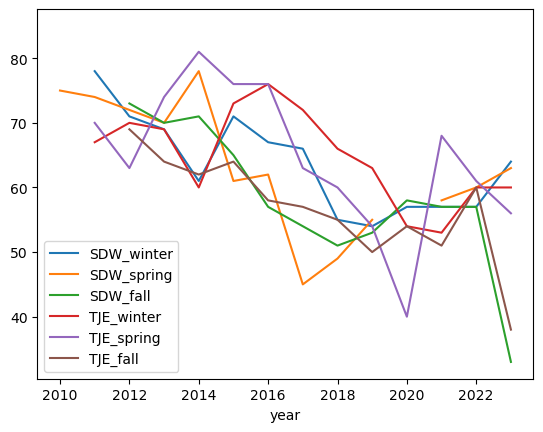

In [24]:
(df.set_index('year')
    .loc[:,'SDW_winter':'TJE_fall']
    .plot()
) # Need parenthesis to run with indents

## About the data

Palmer penguins data about size measurements for three penguin species in the Palmer Archipelago during 2007-2009.

In [25]:
# Load the data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'

penguins = pd.read_csv(URL)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [26]:
# Check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [27]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [31]:
# Unique values in the species column
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [32]:
# Count per unique value in species column
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## `kind` argument in `plot()`

`plot()` creates a line plot by default.
If we change the value of the kind parameter, we can create different kinds of plots

### Scatterplot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

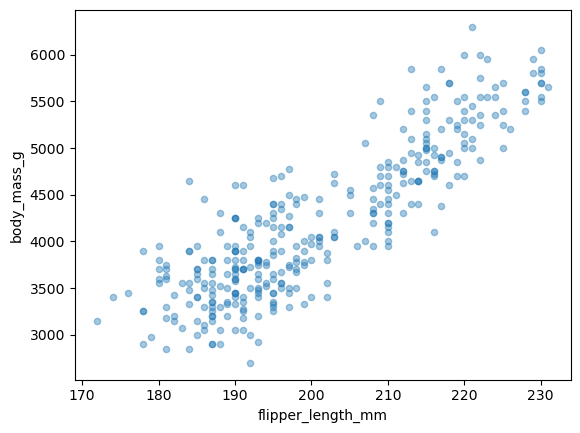

In [35]:
# Compare flipper length against body mass using scatterplot
penguins.plot(kind = 'scatter',
             x = 'flipper_length_mm',
             y = 'body_mass_g',
             alpha = 0.4 # transparency
             )